In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline


In [12]:
Trained_Data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTest-21.txt//test.txt" , sep = "," , encoding = 'utf-8')

In [13]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [14]:
Tested_Data

,13,tcp,telnet,SF,118,2425,0,0.1,0.2,0.3,...,0.38,0.12,0.04,0.00.6,0.00.7,0.00.8,0.12.1,0.30,guess_passwd,2
0,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.90,0.01,0.00,0.00,0.00,0.00,0.01,0.00,back,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18
11845,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18
11846,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13
11847,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15


In [15]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [16]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [17]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [18]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.90,0.01,0.00,0.00,0.00,0.00,0.01,0.00,back,10
5,0,tcp,imap4,REJ,0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
6,7570,tcp,telnet,SF,0,44,0,0,0,0,...,0.65,0.33,0.00,0.00,0.49,0.76,0.33,0.01,processtable,18
7,0,udp,private,SF,56,52,0,0,0,0,...,1.00,0.00,0.93,0.00,0.00,0.00,0.00,0.00,normal,17
8,0,tcp,ftp_data,SF,192,0,0,0,0,0,...,0.09,0.04,0.09,0.04,0.00,0.00,0.01,0.00,normal,20
9,0,tcp,other,REJ,0,0,0,0,0,0,...,0.00,0.94,0.00,0.00,0.13,0.00,0.87,1.00,satan,20


In [19]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [20]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11849 non-null  int64  
 1   protocol_type                11849 non-null  object 
 2   service                      11849 non-null  object 
 3   flag                         11849 non-null  object 
 4   src_bytes                    11849 non-null  int64  
 5   dst_bytes                    11849 non-null  int64  
 6   land                         11849 non-null  int64  
 7   wrong_fragment               11849 non-null  int64  
 8   urgent                       11849 non-null  int64  
 9   hot                          11849 non-null  int64  
 10  num_failed_logins            11849 non-null  int64  
 11  logged_in                    11849 non-null  int64  
 12  num_compromised              11849 non-null  int64  
 13  root_shell      

In [21]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [24]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,11849.000000,1.184900e+04,1.184900e+04,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,...,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000
mean,415.473795,1.945807e+04,1.228004e+03,0.000591,0.016035,0.001350,0.190227,0.041185,0.253017,0.227699,...,117.550679,0.539610,0.148989,0.206507,0.024467,0.104190,0.106706,0.263964,0.252205,15.327960
std,1919.519063,6.520140e+05,2.389704e+04,0.024300,0.196387,0.050302,1.222442,0.205409,0.434759,10.026197,...,106.563355,0.423385,0.288770,0.379206,0.114238,0.265095,0.278559,0.377350,0.403056,4.405964
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,17.000000
75%,1.000000,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,18.000000
max,57715.000000,6.282565e+07,1.288652e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [25]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [26]:
Tested_Data.nunique()

duration                       605
protocol_type                    3
service                         62
flag                            11
src_bytes                      610
dst_bytes                      505
land                             2
wrong_fragment                   3
urgent                           4
hot                             15
num_failed_logins                5
logged_in                        2
num_compromised                 23
root_shell                       2
su_attempted                     3
num_root                        20
num_file_creations               9
num_shells                       4
num_access_files                 5
num_outbound_cmds                1
is_host_login                    2
is_guest_login                   2
count                          495
srv_count                      456
serror_rate                     71
srv_serror_rate                 73
rerror_rate                     74
srv_rerror_rate                 88
same_srv_rate       

In [27]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [28]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1288652
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


In [29]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'teardrop', 'ipsweep', 'normal', 'ftp_write', 'warezmaster', 'perl', 'phf', 'land', 'pod', 'loadmodule', 'warezclient', 'neptune', 'spy', 'guess_passwd', 'imap', 'back', 'buffer_overflow', 'smurf', 'multihop', 'nmap', 'rootkit', 'satan', 'portsweep'} 

In [30]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [31]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [32]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,private,SF,44,0,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12,1
1,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18,1
2,0,udp,private,SF,53,55,0,0,0,0,...,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17,0
3,0,tcp,private,SH,0,0,0,0,0,0,...,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17,1
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,back,10,1
5,0,tcp,imap4,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19,1
6,7570,tcp,telnet,SF,0,44,0,0,0,0,...,0.33,0.00,0.00,0.49,0.76,0.33,0.01,processtable,18,1
7,0,udp,private,SF,56,52,0,0,0,0,...,0.00,0.93,0.00,0.00,0.00,0.00,0.00,normal,17,0
8,0,tcp,ftp_data,SF,192,0,0,0,0,0,...,0.04,0.09,0.04,0.00,0.00,0.01,0.00,normal,20,0
9,0,tcp,other,REJ,0,0,0,0,0,0,...,0.94,0.00,0.00,0.13,0.00,0.87,1.00,satan,20,1


In [33]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [34]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [35]:
Trained_Data.duplicated().sum()

0

In [36]:
Tested_Data.duplicated().sum()

0

In [37]:
Trained_Data.shape

(125972, 44)

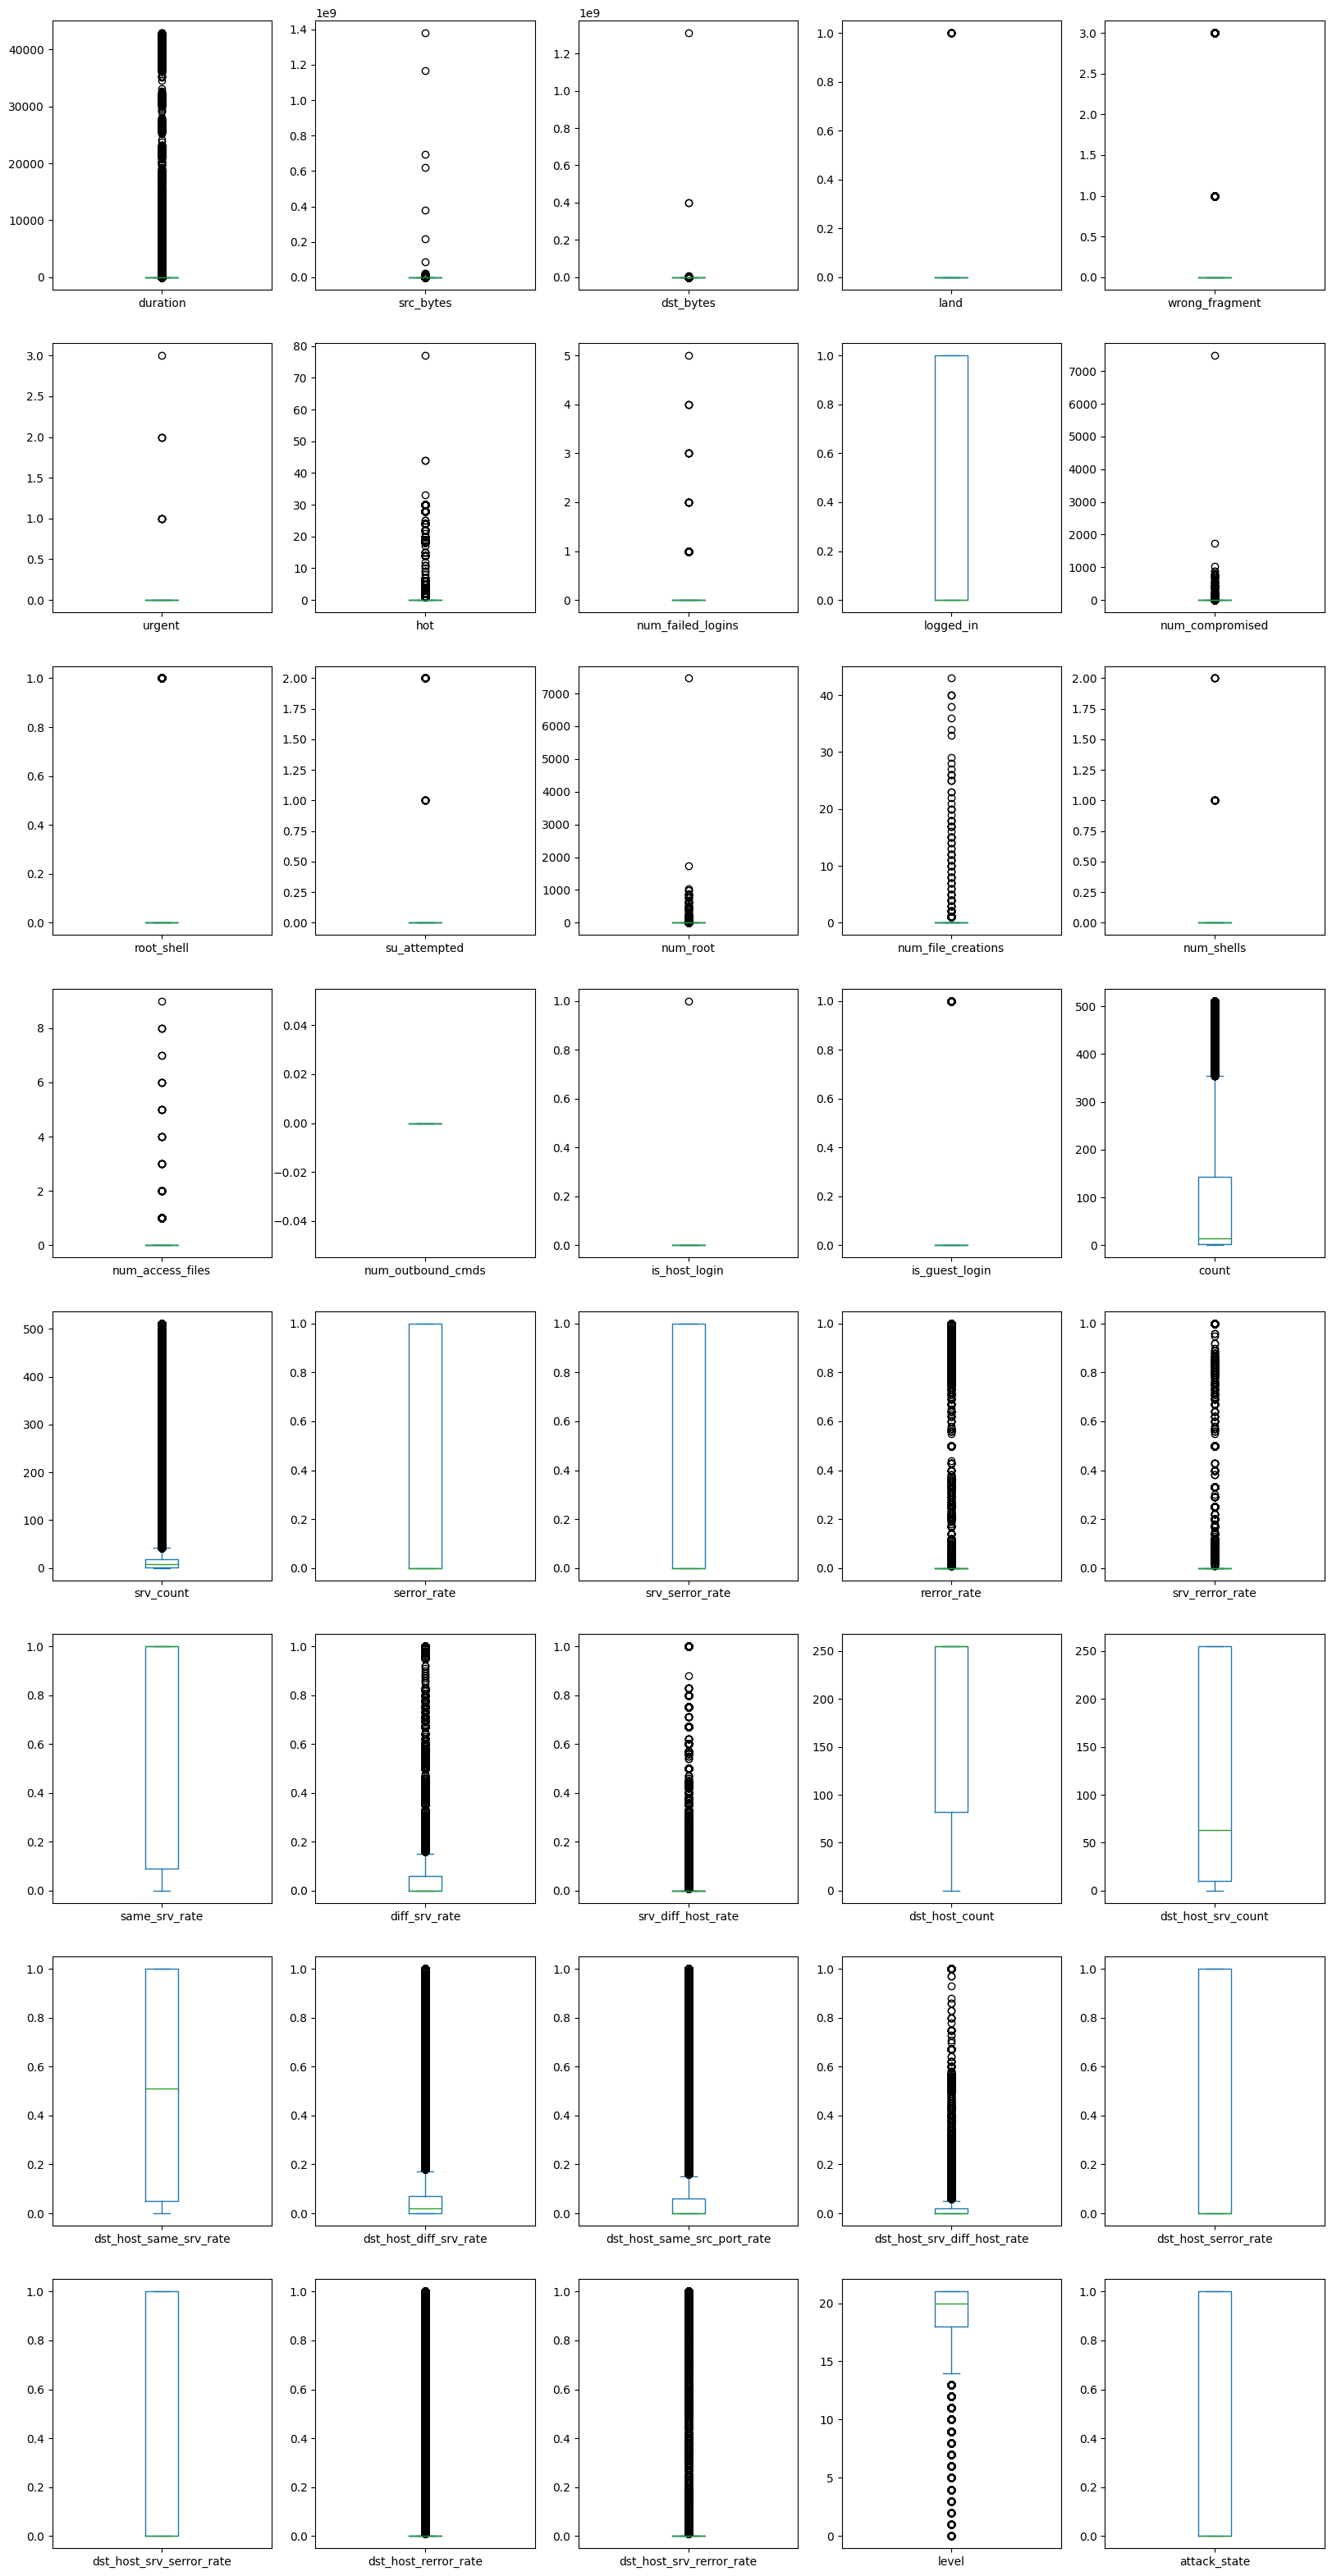

In [42]:
Trained_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()


In [43]:
Tested_Data.shape

(11849, 44)

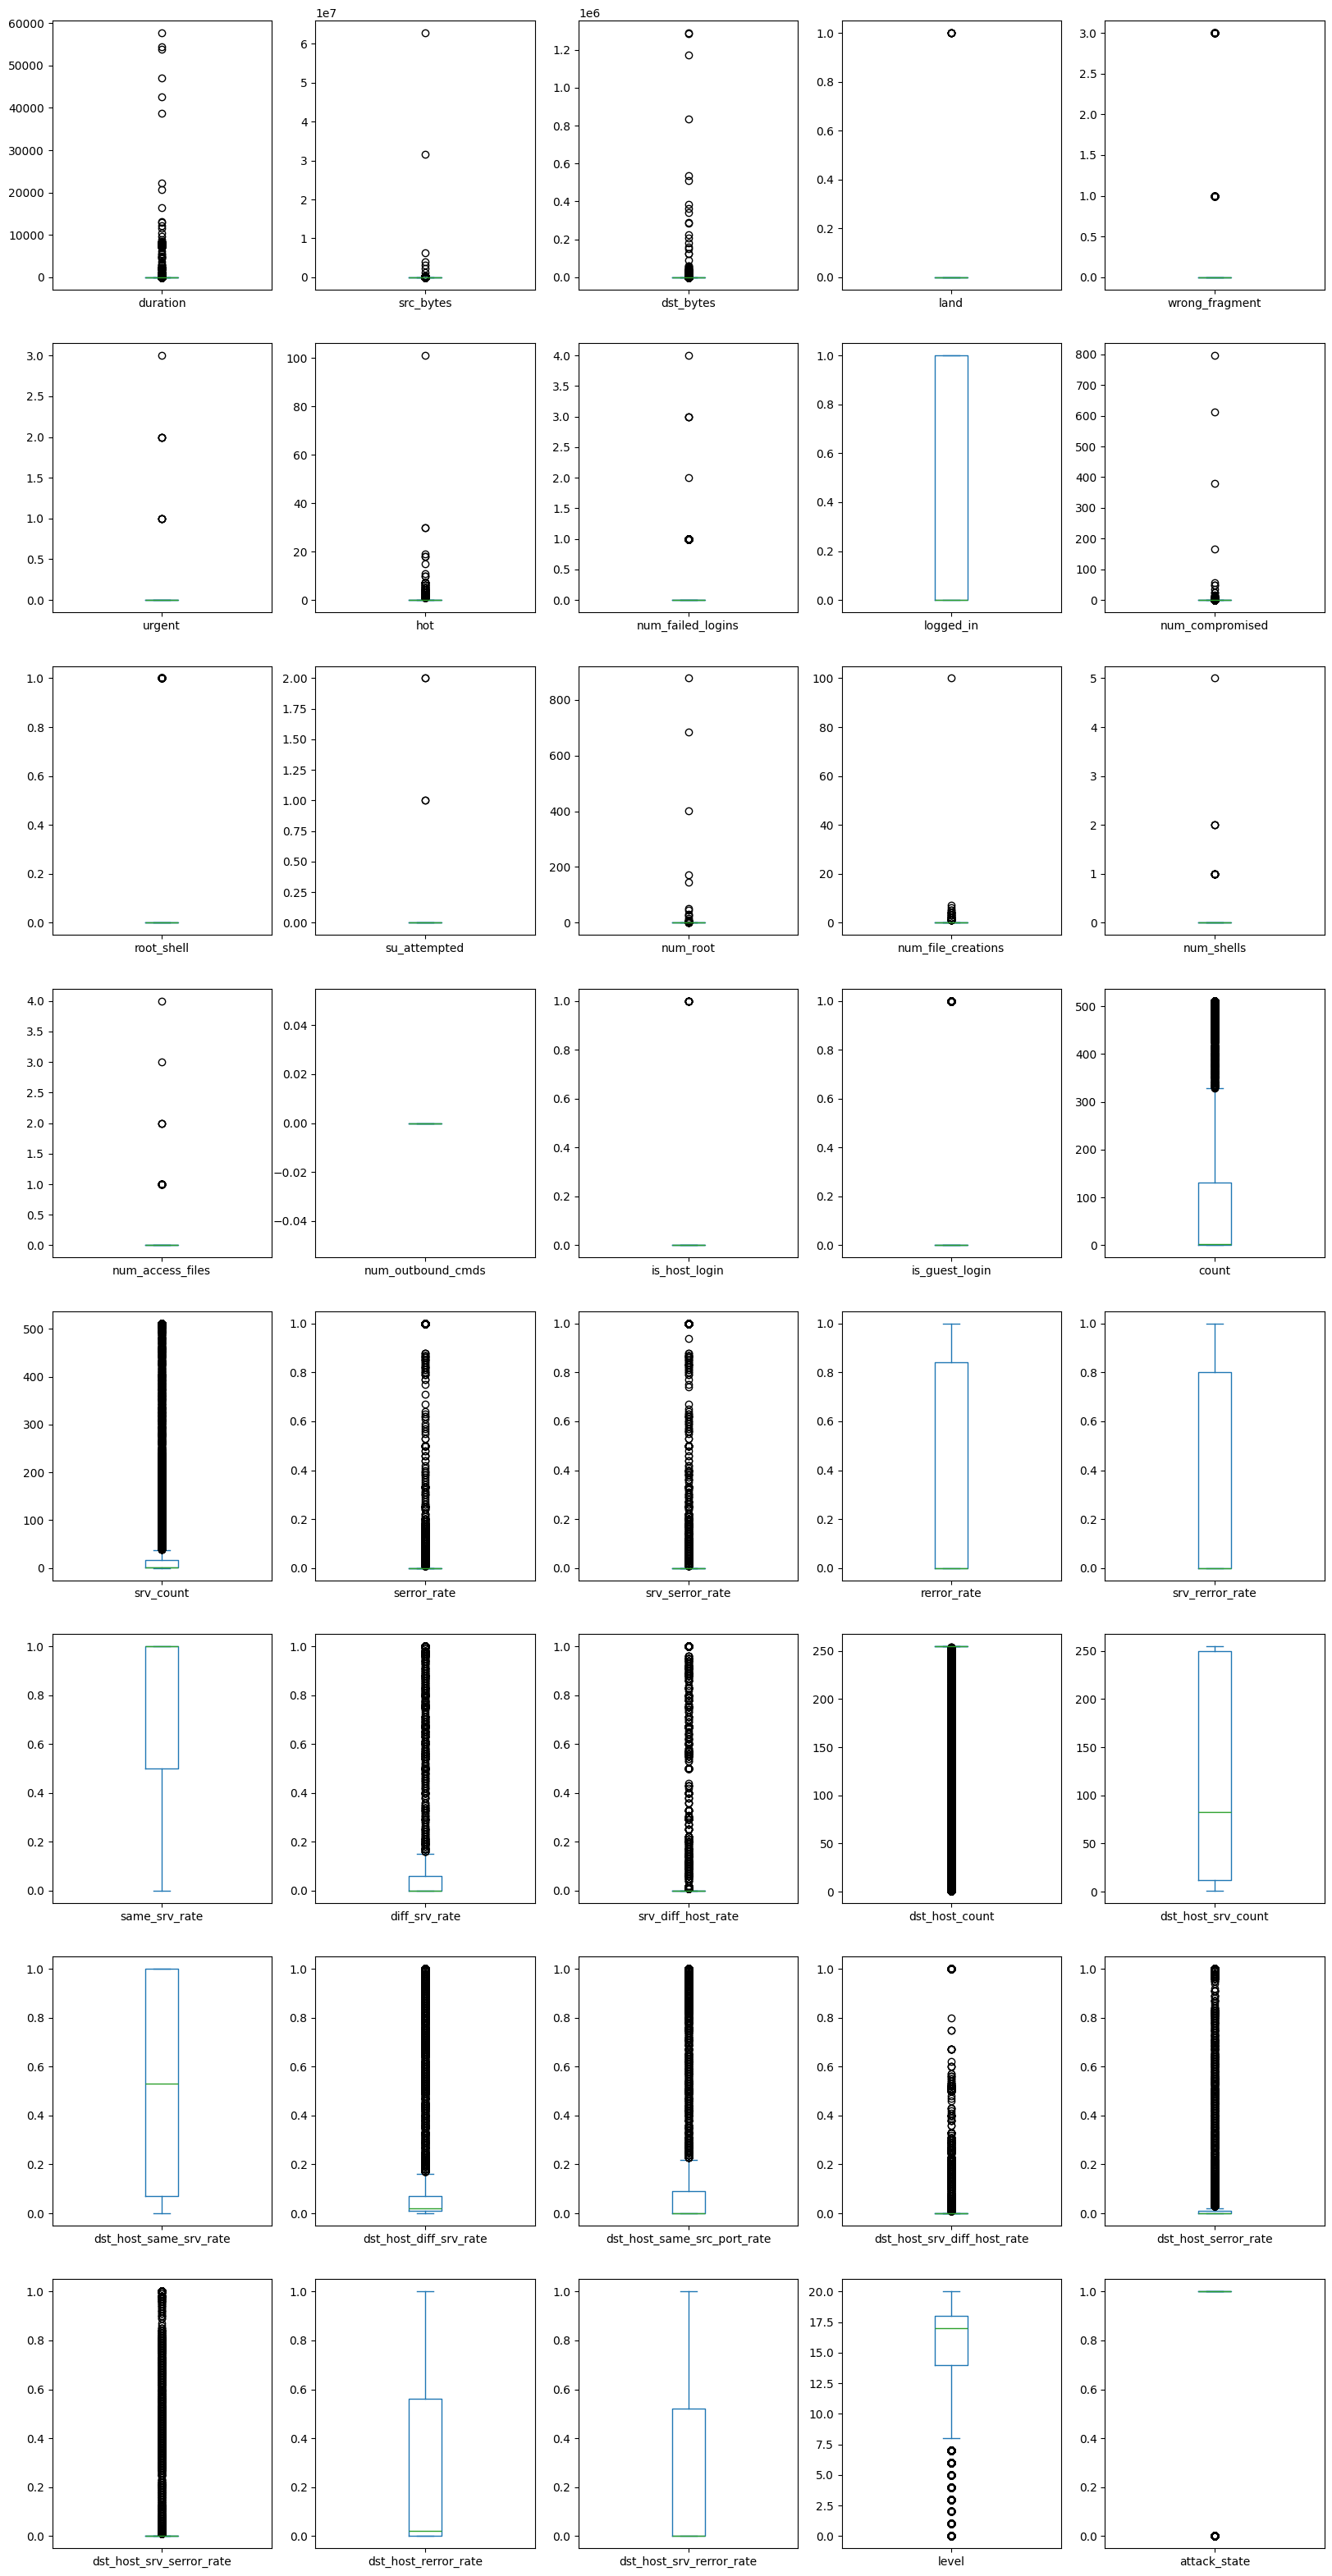

In [45]:

Tested_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()


In [46]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [47]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [48]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

In [49]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [50]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

In [51]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [52]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [53]:
X_test_train.shape, Y_test_train.shape

((31493, 124), (31493,))

In [54]:
X_train_test.shape, Y_train_test.shape

((8886, 116), (8886,))

In [55]:
X_test_test.shape, Y_test_test.shape

((2963, 116), (2963,))

In [57]:
import statsmodels.api as sm

# Check for non-numeric data and convert if necessary
X_train_numeric = X_train.astype(float)  # Assuming X_train is your feature matrix
Y_train_numeric = Y_train.astype(float)  # Assuming Y_train is your target variable

# Add constant to the feature matrix
X_train_numeric = sm.add_constant(X_train_numeric)

# Fit the GLM model
estimator = sm.GLM(Y_train_numeric, X_train_numeric, family=sm.families.Gaussian())
model = estimator.fit()

# Display summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125852
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                        0.021929
Method:                          IRLS   Log-Likelihood:                 61917.
Date:                Wed, 12 Jun 2024   Deviance:                       2759.8
Time:                        02:20:17   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [58]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    plot_roc_curve(Model_Abb, X_test, Y_test)

In [59]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

In [60]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [61]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.885699467606558, 0.8851808338360906)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.885

The Logistic Regression Model Sensitvity = 0.89

The Logistic Regression Model Precision  = 0.869

The Logistic Regression Model F1 Score   = 0.879

The Logistic Regression Model Recall     = 0.89

--------------------------------------------------



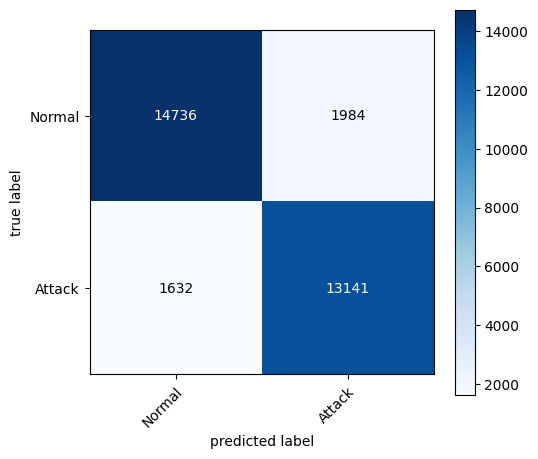

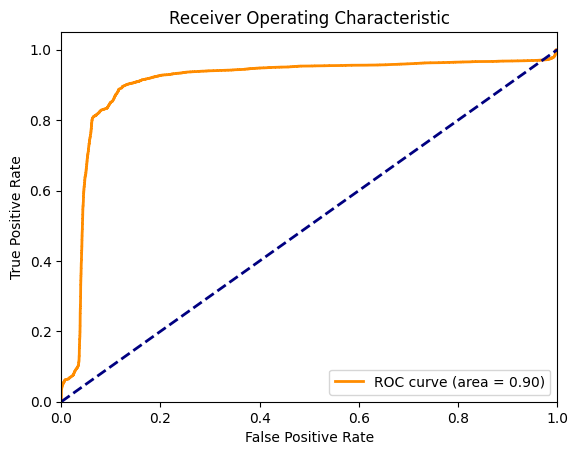

In [65]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

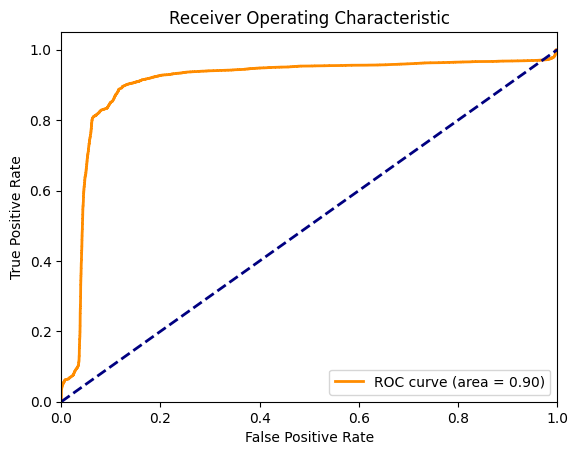

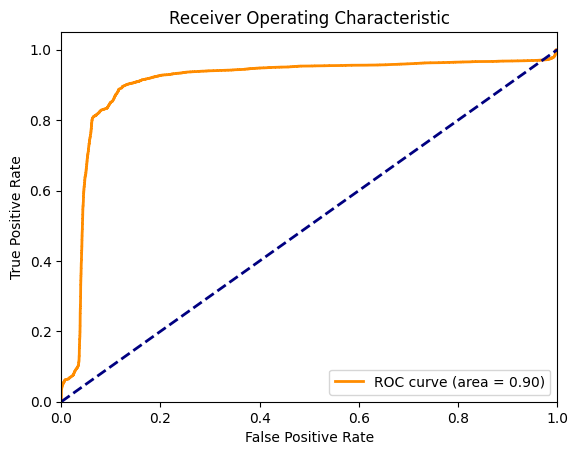

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Now you can call the function:
plot_roc_curve(LR, X_test_train, Y_test_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Now you can call the function:
plot_roc_curve(LR, X_test_train, Y_test_train)


In [66]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [67]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9492797341208099, 0.9493220715714603)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.949

The Decision Tree Classifier Model Sensitvity = 0.913

The Decision Tree Classifier Model Precision  = 0.978

The Decision Tree Classifier Model F1 Score   = 0.944

The Decision Tree Classifier Model Recall     = 0.913

--------------------------------------------------



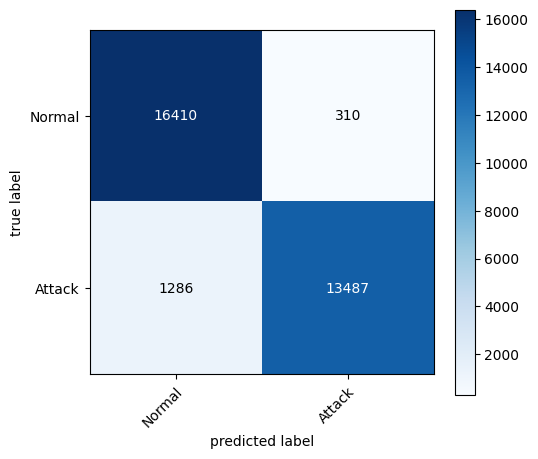

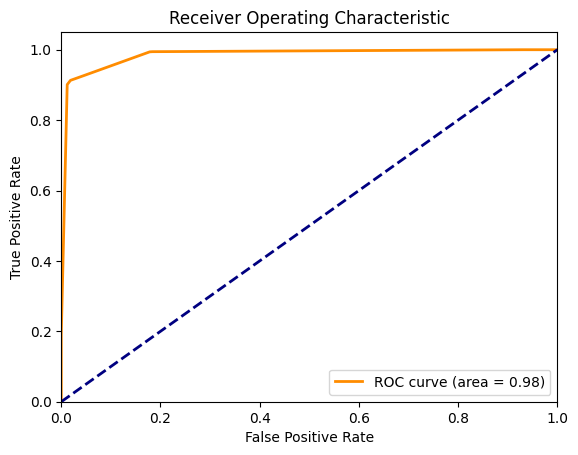

In [68]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.5595238095238095, 0.9, 'x[26] <= 0.583\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.2619047619047619, 0.7, 'x[1] <= -0.056\ngini = 0.288\nsamples = 58392\nvalue = [48225, 10167]'),
 Text(0.09523809523809523, 0.5, 'x[38] <= -0.25\ngini = 0.453\nsamples = 9819\nvalue = [3412.0, 6407.0]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 3964\nvalue = [0, 3964]'),
 Text(0.14285714285714285, 0.3, 'x[38] <= 1.0\ngini = 0.486\nsamples = 5855\nvalue = [3412, 2443]'),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 3412\nvalue = [3412, 0]'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 2443\nvalue = [0, 2443]'),
 Text(0.42857142857142855, 0.5, 'x[9] <= 0.5\ngini = 0.143\nsamples = 48573\nvalue = [44813, 3760]'),
 Text(0.3333333333333333, 0.3, 'x[39] <= -0.167\ngini = 0.121\nsamples = 47633\nvalue = [44551, 3082]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.427\nsamples = 9334\nvalue = [6451, 2883]'),
 Text(0.38095238095238093, 0.1, 'gini = 0.

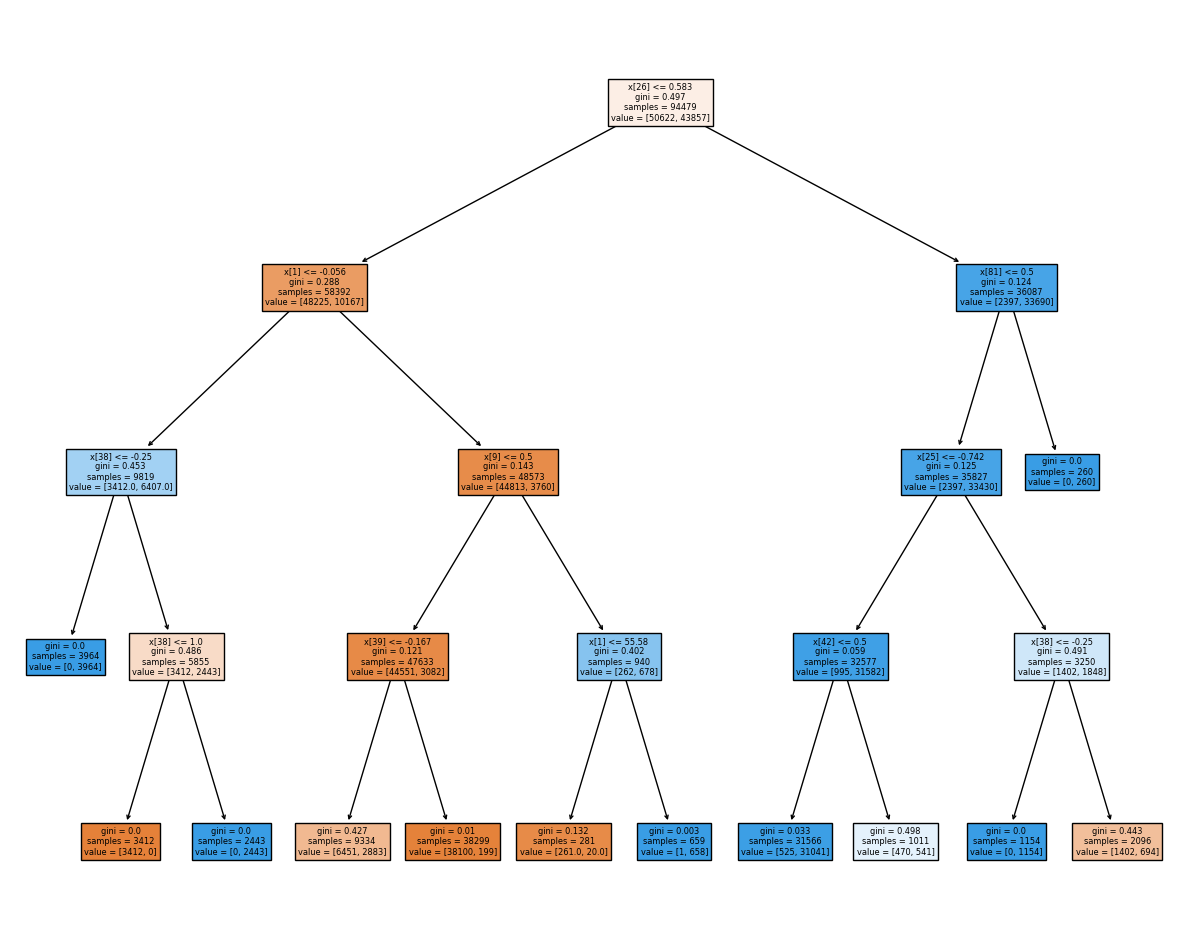

In [69]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

In [70]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [72]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=10)

In [73]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [74]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.9999682469120122)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



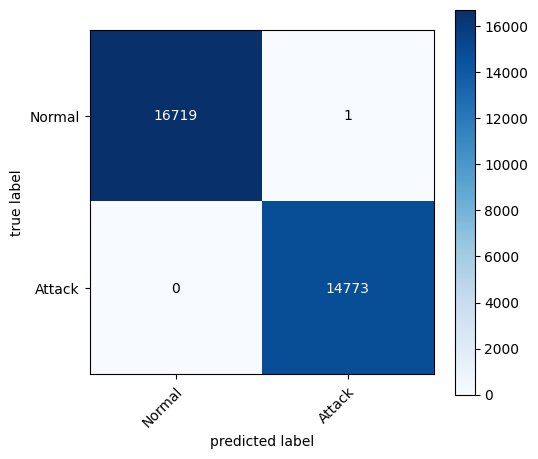

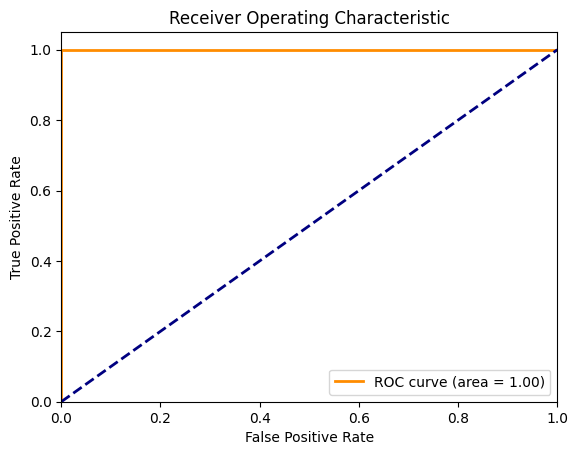

In [75]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

In [76]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [77]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



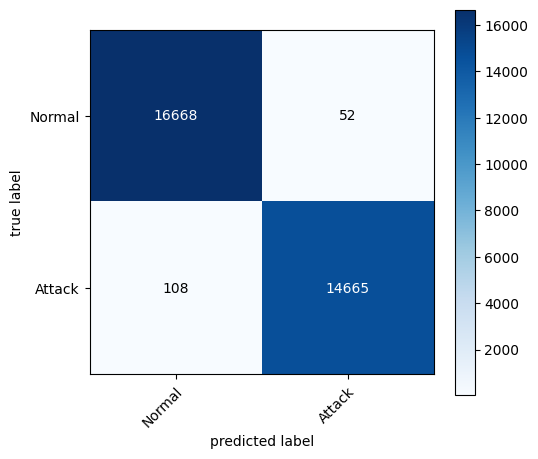

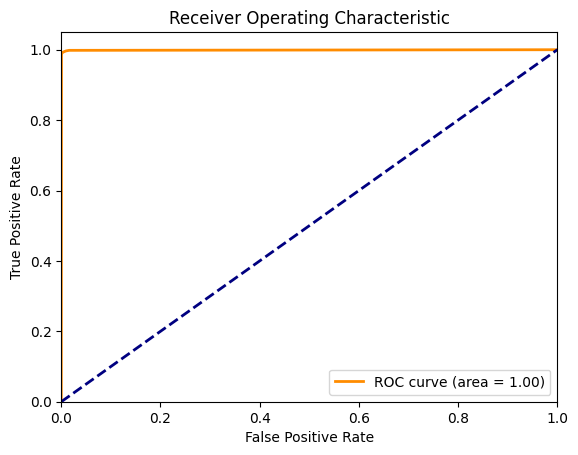

In [78]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

In [79]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

LinearSVC(C=1)

In [80]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(0.9783549783549783, 0.977804591496523)

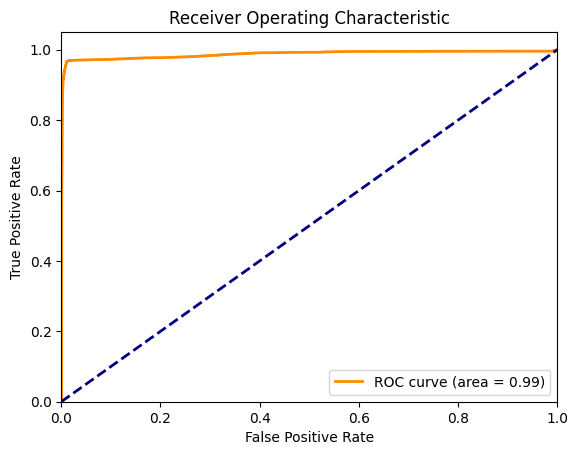

In [83]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        raise AttributeError("The model does not have a decision_function method.")

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Now you can call the function:
plot_roc_curve(Linear_SVC, X_test_train, Y_test_train)


--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.978

The SVM Linear SVC Kernel Model Sensitvity = 0.967

The SVM Linear SVC Kernel Model Precision  = 0.986

The SVM Linear SVC Kernel Model F1 Score   = 0.976

The SVM Linear SVC Kernel Model Recall     = 0.967

--------------------------------------------------



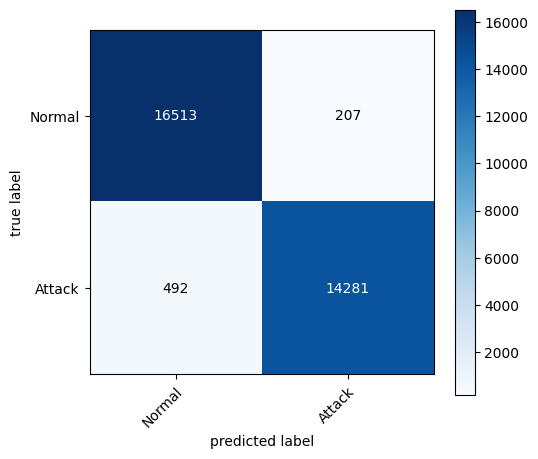

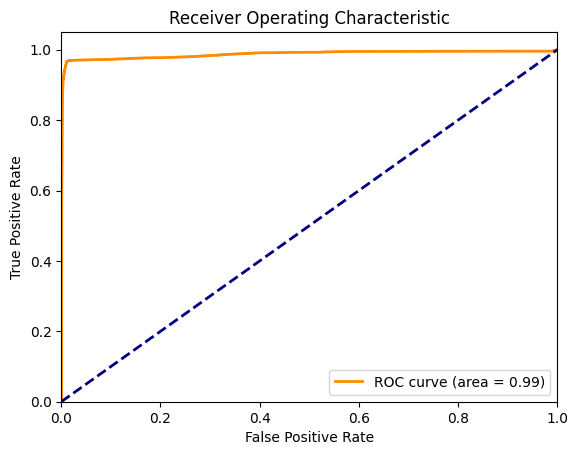

In [84]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)

Model: SVM Linear SVC Kernel
Accuracy: 0.6577652176674181
Precision: 0.5793508918285465
Recall: 0.9872063900358763
F1 Score: 0.7301857507635308

Model: Random Forest Classifier
Accuracy: 0.46956466516368717
Precision: 0.469311900374865
Recall: 1.0
F1 Score: 0.638818620137943

Model: KNN
Accuracy: 0.42472930492490396
Precision: 0.4376677602147331
Recall: 0.7946930210519191
F1 Score: 0.5644637834459216

Model: Logistic Regression
Accuracy: 0.8951195503762741
Precision: 0.9186742590159147
Recall: 0.8518242740134029
F1 Score: 0.8839872150609392

Model: Decision Tree Classifier
Accuracy: 0.6629727240974185
Precision: 0.5907167473716355
Recall: 0.9166046165301563
F1 Score: 0.7184316638370118



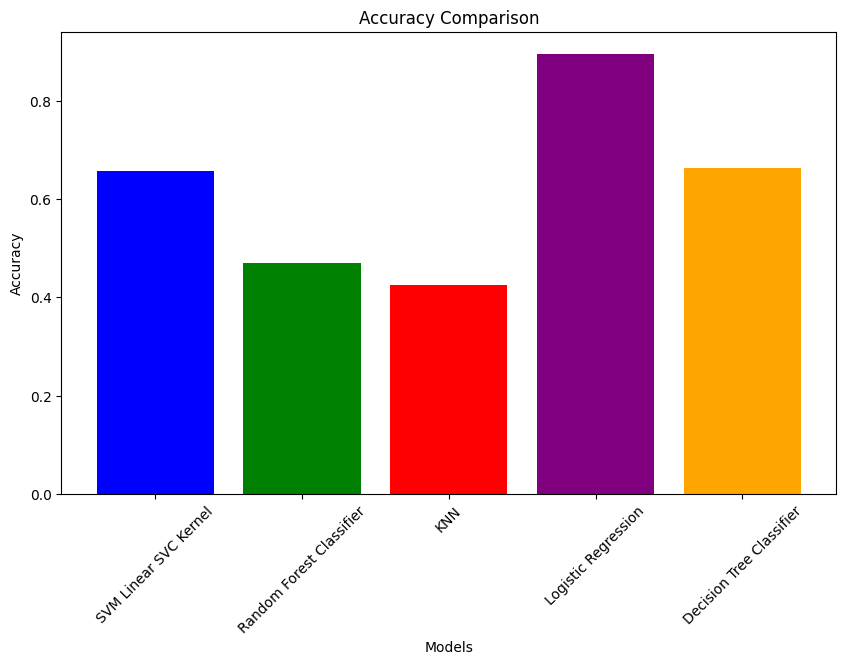

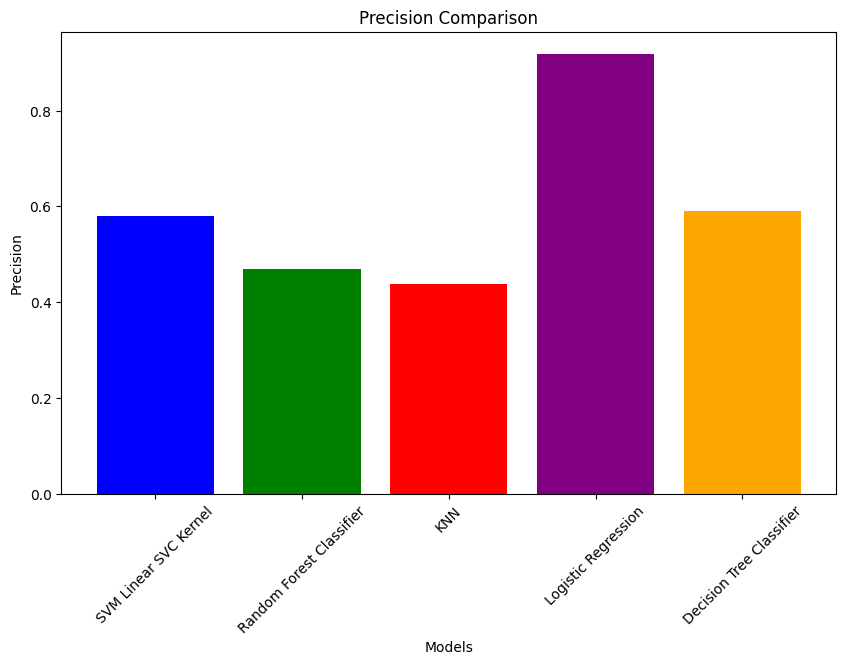

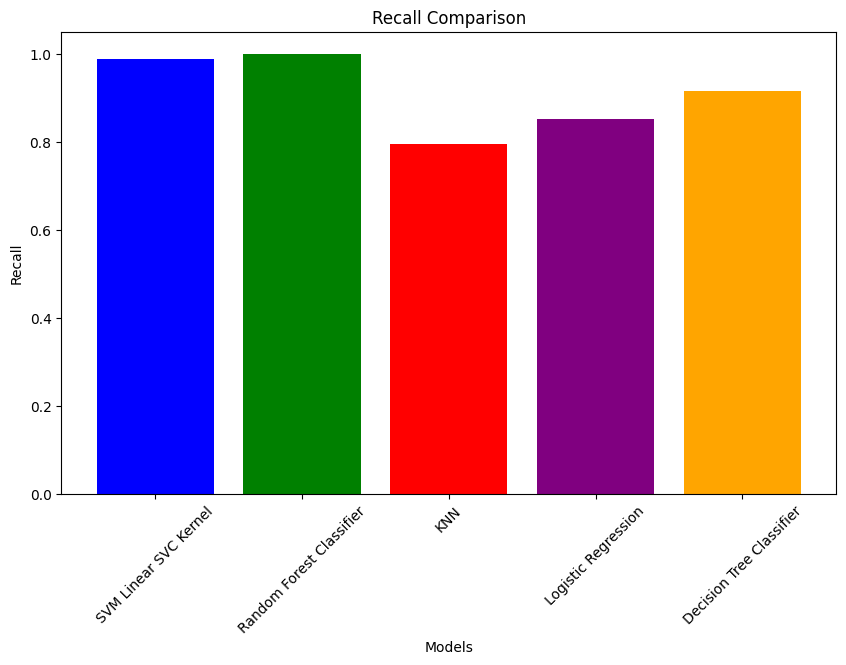

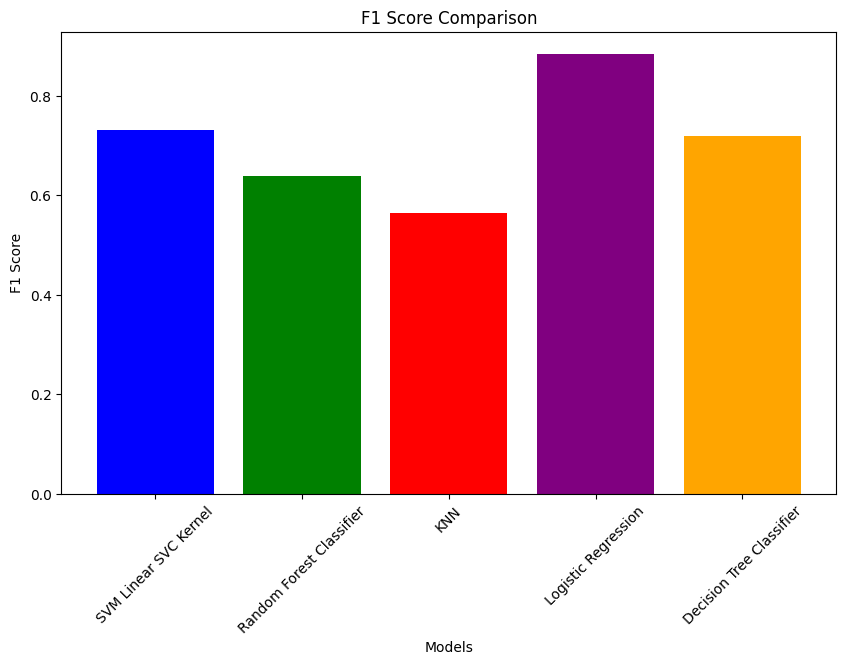

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def Evaluate(model_name, model, X_test, y_test):
    # Train the model (if not already trained)
    model.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    
    return accuracy, precision, recall, f1

# Evaluate each model
results = {}

models = {
    'SVM Linear SVC Kernel': Linear_SVC,
    'Random Forest Classifier': RF,
    'KNN': KNN,
    'Logistic Regression': LR,
    'Decision Tree Classifier': DT
}

for name, model in models.items():
    results[name] = Evaluate(name, model, X_test_train, Y_test_train)

# Plotting the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), [result[i] for result in results.values()], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title(metric + ' Comparison')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


In [89]:
# Use label encoder to map attack names to encoded labels
attack_encoder = attack_LE.inverse_transform(Trained_Data['attack'].unique())

# Create a dictionary to map encoded labels to attack names
attack_dict = dict(zip(Trained_Data['attack'].unique(), attack_encoder))

print("Attacks in Training Data:")
for attack_code, attack_name in attack_dict.items():
    print(f"Attack Code: {attack_code}, Attack Name: {attack_name}")


Attacks in Training Data:
Attack Code: 11, Attack Name: mscan
Attack Code: 9, Attack Name: loadmodule
Attack Code: 21, Attack Name: processtable
Attack Code: 5, Attack Name: httptunnel
Attack Code: 15, Attack Name: nmap
Attack Code: 20, Attack Name: portsweep
Attack Code: 10, Attack Name: mailbomb
Attack Code: 17, Attack Name: perl
Attack Code: 18, Attack Name: phf
Attack Code: 14, Attack Name: neptune
Attack Code: 0, Attack Name: apache2
Attack Code: 3, Attack Name: ftp_write
Attack Code: 2, Attack Name: buffer_overflow
Attack Code: 8, Attack Name: land
Attack Code: 16, Attack Name: normal
Attack Code: 1, Attack Name: back
Attack Code: 4, Attack Name: guess_passwd
Attack Code: 22, Attack Name: ps
Attack Code: 13, Attack Name: named
Attack Code: 6, Attack Name: imap
Attack Code: 7, Attack Name: ipsweep
Attack Code: 19, Attack Name: pod
Attack Code: 12, Attack Name: multihop


In [94]:
# Load dataset
data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt", sep=",", encoding='utf-8')

# Print the first few rows to inspect the dataset structure
print(data.head())

# Based on the output, identify the correct column names and update your code accordingly


   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]


In [95]:
# Load dataset
data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt", sep=",", encoding='utf-8')

# Filter dataset for TCP connections
tcp_data = data[data['tcp'] == 'tcp']

# Print the first few rows to verify the filtering
print(tcp_data.head())


   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   
5  0  tcp  private   S0    0     0    0    0    0    0  ...  0.04  0.05   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  
5    0.00    0.00    1.00    1.00   0.0    0.00  neptune  21  

[5 rows x 43 columns]


In [99]:
# Load dataset
data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt", sep=",", encoding='utf-8')

# Print column names with their index positions
for index, column_name in enumerate(data.columns):
    print("Index:", index, "Column Name:", column_name)


Index: 0 Column Name: 0
Index: 1 Column Name: tcp
Index: 2 Column Name: ftp_data
Index: 3 Column Name: SF
Index: 4 Column Name: 491
Index: 5 Column Name: 0.1
Index: 6 Column Name: 0.2
Index: 7 Column Name: 0.3
Index: 8 Column Name: 0.4
Index: 9 Column Name: 0.5
Index: 10 Column Name: 0.6
Index: 11 Column Name: 0.7
Index: 12 Column Name: 0.8
Index: 13 Column Name: 0.9
Index: 14 Column Name: 0.10
Index: 15 Column Name: 0.11
Index: 16 Column Name: 0.12
Index: 17 Column Name: 0.13
Index: 18 Column Name: 0.14
Index: 19 Column Name: 0.15
Index: 20 Column Name: 0.16
Index: 21 Column Name: 0.18
Index: 22 Column Name: 2
Index: 23 Column Name: 2.1
Index: 24 Column Name: 0.00
Index: 25 Column Name: 0.00.1
Index: 26 Column Name: 0.00.2
Index: 27 Column Name: 0.00.3
Index: 28 Column Name: 1.00
Index: 29 Column Name: 0.00.4
Index: 30 Column Name: 0.00.5
Index: 31 Column Name: 150
Index: 32 Column Name: 25
Index: 33 Column Name: 0.17
Index: 34 Column Name: 0.03
Index: 35 Column Name: 0.17.1
Index: 36

In [101]:
# Load dataset
data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt", sep=",", encoding='utf-8')

# Filter dataset for TCP connections
tcp_data = data[data['tcp'] == 'tcp']

# List all unique attacks in TCP connections
tcp_attacks = tcp_data['20'].unique()

print("Attacks involving TCP connections:")
for attack in tcp_attacks:
    print(attack)


Attacks involving TCP connections:
19
21
15
18
20
12
14
11
17
2
13
16
10
9
8
3
5
7
1
6
0
4


In [106]:
# Load dataset
data = pd.read_csv("C://Users//Asus//Desktop//fyp_azfar//dataset//kdd//KDDTrain+.txt//train.txt", sep=",", encoding='utf-8')

# List all unique attacks in TCP connections
tcp_attacks = data['20'].unique()

print("Attacks involving TCP connections:")
for attack in tcp_attacks:
    print(attack)


Attacks involving TCP connections:
15
19
21
18
20
17
16
12
14
11
2
13
10
9
8
7
3
5
1
6
0
4
